In [1]:
import numpy as np
import xobjects as xo
import xtrack as xt
import xpart as xp
import json
import pandas as pd
from cpymad.madx import Madx
from matplotlib import pyplot as plt
%matplotlib inline
import NAFFlib

In [45]:
context = xo.ContextCupy()

In [3]:
mad = Madx()
mad.call('andrea.madx')
mad.use(sequence="lhcb1")

GC Warning: Repeated allocation of very large block (appr. size 323584):
	May lead to memory leak and poor performance
GC Warning: Repeated allocation of very large block (appr. size 491520):
	May lead to memory leak and poor performance


In [4]:
#line.element_names
line = xt.Line.from_madx_sequence(mad.sequence['lhcb1'],
                                  deferred_expressions=True
                                  )

In [5]:
print(line.vars['i_mo']._get_value())
line.vars['i_mo'] = 350
print(line.vars['i_mo']._get_value())

-350.0
350


In [6]:
particles_3 = xp.Particles(_context=ctx,
                        p0c=7000e9,
                        x=[1.00951707e-08],px=[1.69518015e-10],
                        y=[5.65551848e-12],py=[6.07695199e-14]
                        )

In [46]:
tracker1 = xt.Tracker(_context=ctx, line=line)

generating ./4f1df0a39c3d4b42924aa96f6b2f4588.c
the current directory is '/home/afornara/studies/git_postprocessing'
running build_ext
building '4f1df0a39c3d4b42924aa96f6b2f4588' extension
gcc -pthread -B /home/afornara/py/2022_03_04/miniconda/compiler_compat -Wno-unused-result -Wsign-compare -DNDEBUG -O2 -Wall -fPIC -O2 -isystem /home/afornara/py/2022_03_04/miniconda/include -I/home/afornara/py/2022_03_04/miniconda/include -fPIC -O2 -isystem /home/afornara/py/2022_03_04/miniconda/include -fPIC -I/home/afornara/py/2022_03_04/miniconda/include/python3.9 -c 4f1df0a39c3d4b42924aa96f6b2f4588.c -o ./4f1df0a39c3d4b42924aa96f6b2f4588.o -std=c99 -O3 -Wno-unused-function
gcc -pthread -B /home/afornara/py/2022_03_04/miniconda/compiler_compat -shared -Wl,-rpath,/home/afornara/py/2022_03_04/miniconda/lib -Wl,-rpath-link,/home/afornara/py/2022_03_04/miniconda/lib -L/home/afornara/py/2022_03_04/miniconda/lib -L/home/afornara/py/2022_03_04/miniconda/lib -Wl,-rpath,/home/afornara/py/2022_03_04/minicon

In [47]:
tw = tracker1.twiss(particles_3)
#print(tw['betx'][0])
#Scorrere sugli ottupoli
sum_nl = 0.0
count_nl = 0
sum_sl = 0.0
count_sl = 0
ii = 0
for elem in line.element_dict :
    #print('elem is',elem,'and tw[name][elem]=',tw['name'][ii])
    if isinstance(line.element_dict[elem],xt.beam_elements.elements.Multipole): 
        if(line.element_dict[elem].order==3):
                #i print sono giusti, li commento perché sono lunghi
                #print('elem is',elem,'and tw[name][elem]=',tw['name'][ii],'with beta=',tw['betx'][ii])
                sum_nl+=line.element_dict[elem].knl[3]*tw['betx'][ii]*tw['betx'][ii]
                count_nl+=1
                sum_sl+=line.element_dict[elem].ksl
                count_sl+=1
                #print(elem)
                #print(line.element_dict[elem].knl)
    ii+=1
K_OCT = sum_nl/count_nl
K_OCT

14088.220762532888

In [48]:
dir(tw)
tw['name'][1]
tw['bety']

array([216.21285239, 216.21285239, 216.21285239, ..., 131.08576058,
       131.08576058, 216.21336057])

In [67]:
tracker1 = xt.Tracker(_context=ctx, line=line)
tw1 = tracker1.twiss(particles_3)
tracker2 = xt.Tracker(_context=ctx, line=line)
tw2 = tracker2.twiss(particles_3)
tracker3 = xt.Tracker(_context=ctx, line=line)
tw3 = tracker3.twiss(particles_3)
tracker4 = xt.Tracker(_context=ctx, line=line)
tw4 = tracker4.twiss(particles_3)
tracker5 = xt.Tracker(_context=ctx, line=line)
tw5 = tracker5.twiss(particles_3)

generating ./17e86893d4314300afcd523e4853ddb3.c
the current directory is '/home/afornara/studies/git_postprocessing'
running build_ext
building '17e86893d4314300afcd523e4853ddb3' extension
gcc -pthread -B /home/afornara/py/2022_03_04/miniconda/compiler_compat -Wno-unused-result -Wsign-compare -DNDEBUG -O2 -Wall -fPIC -O2 -isystem /home/afornara/py/2022_03_04/miniconda/include -I/home/afornara/py/2022_03_04/miniconda/include -fPIC -O2 -isystem /home/afornara/py/2022_03_04/miniconda/include -fPIC -I/home/afornara/py/2022_03_04/miniconda/include/python3.9 -c 17e86893d4314300afcd523e4853ddb3.c -o ./17e86893d4314300afcd523e4853ddb3.o -std=c99 -O3 -Wno-unused-function
gcc -pthread -B /home/afornara/py/2022_03_04/miniconda/compiler_compat -shared -Wl,-rpath,/home/afornara/py/2022_03_04/miniconda/lib -Wl,-rpath-link,/home/afornara/py/2022_03_04/miniconda/lib -L/home/afornara/py/2022_03_04/miniconda/lib -L/home/afornara/py/2022_03_04/miniconda/lib -Wl,-rpath,/home/afornara/py/2022_03_04/minicon

In [69]:
gamma=7000/.938
sigma_x=np.sqrt(120.29057045*3e-6/gamma)
sigma_x
n_turns = 1
N_arr=10000
#x_part0 = np.zeros(N_arr)
#x_part1 = np.zeros(N_arr)
x_part2 = np.zeros(N_arr)
x_part3 = np.zeros(N_arr)
x_part4 = np.zeros(N_arr)
x_part5 = np.zeros(N_arr)
px_part2 = np.zeros(N_arr)
px_part3 = np.zeros(N_arr)
px_part4 = np.zeros(N_arr)
px_part5 = np.zeros(N_arr)
y_part2 = np.zeros(N_arr)
y_part3 = np.zeros(N_arr)
y_part4 = np.zeros(N_arr)
y_part5 = np.zeros(N_arr)
py_part2 = np.zeros(N_arr)
py_part3 = np.zeros(N_arr)
py_part4 = np.zeros(N_arr)
py_part5 = np.zeros(N_arr)
zeta_part2 = np.zeros(N_arr)
zeta_part3 = np.zeros(N_arr)
zeta_part4 = np.zeros(N_arr)
zeta_part5 = np.zeros(N_arr)
delta_part2 = np.zeros(N_arr)
delta_part3 = np.zeros(N_arr)
delta_part4 = np.zeros(N_arr)
delta_part5 = np.zeros(N_arr)

co_part=tw['particle_on_co']
#near_co_particle1=tw1['particle_on_co']
near_co_particle2=tw2['particle_on_co']
near_co_particle3=tw3['particle_on_co']
near_co_particle4=tw4['particle_on_co']
near_co_particle5=tw5['particle_on_co']


if False:
    for ii in range(N_arr):
        tracker.track(co_part, num_turns=n_turns,turn_by_turn_monitor=False)
        #print(particles_3.x)
        x_part0[ii]=co_part.x
    
#near_co_particle1.x=near_co_particle1.x+0.2*sigma_x
near_co_particle2.x=near_co_particle2.x+1*sigma_x
near_co_particle3.x=near_co_particle3.x+2*sigma_x
near_co_particle4.x=near_co_particle4.x+3*sigma_x
near_co_particle5.x=near_co_particle5.x+4*sigma_x

positions = np.zeros(4)
#co_position=near_co_particle2.x
positions[0]=near_co_particle2.x-co_part.x
positions[1]=near_co_particle3.x-co_part.x
positions[2]=near_co_particle4.x-co_part.x
positions[3]=near_co_particle5.x-co_part.x
print(positions[0],positions[1],positions[2],positions[3])

if False:
    for ii in range(N_arr):
        tracker1.track(near_co_particle1, num_turns=n_turns,turn_by_turn_monitor=False)
        x_part1[ii]=near_co_particle1.x
        print(x_part1[ii])
for ii in range(N_arr):
    tracker2.track(near_co_particle2, num_turns=n_turns,turn_by_turn_monitor=False)
    x_part2[ii]=near_co_particle2.x
    px_part2[ii]=near_co_particle2.px
    y_part2[ii]=near_co_particle2.y
    py_part2[ii]=near_co_particle2.py
    zeta_part2[ii]=near_co_particle2.zeta
    delta_part2[ii]=near_co_particle2.delta
    #print(x_part2[ii])
for ii in range(N_arr):
    tracker3.track(near_co_particle3, num_turns=n_turns,turn_by_turn_monitor=False)
    x_part3[ii]=near_co_particle3.x
    px_part3[ii]=near_co_particle3.px
    y_part3[ii]=near_co_particle3.y
    py_part3[ii]=near_co_particle3.py
    zeta_part3[ii]=near_co_particle3.zeta
    delta_part3[ii]=near_co_particle3.delta
    #print(x_part3[ii])
for ii in range(N_arr):
    tracker4.track(near_co_particle4, num_turns=n_turns,turn_by_turn_monitor=False)
    x_part4[ii]=near_co_particle4.x
    px_part4[ii]=near_co_particle4.px
    y_part4[ii]=near_co_particle4.y
    py_part4[ii]=near_co_particle4.py
    zeta_part4[ii]=near_co_particle4.zeta
    delta_part4[ii]=near_co_particle4.delta
for ii in range(N_arr):
    tracker5.track(near_co_particle5, num_turns=n_turns,turn_by_turn_monitor=False)
    x_part5[ii]=near_co_particle5.x
    px_part5[ii]=near_co_particle5.px
    y_part5[ii]=near_co_particle5.y
    py_part5[ii]=near_co_particle5.py
    zeta_part5[ii]=near_co_particle5.zeta
    delta_part5[ii]=near_co_particle5.delta 
   
    #print(x_part5[ii])
    
print(positions[0],positions[1],positions[2])

0.00027624220113915487 0.0008796072698280751 0.0013194109047421126 0.0017592145396561501
0.00027624220113915487 0.0008796072698280751 0.0013194109047421126


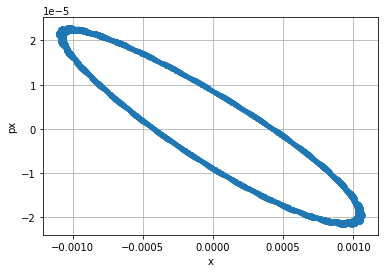

In [70]:
plt.plot(x_part2,px_part2,'.')
plt.grid()
plt.xlabel('x')
plt.ylabel('px');

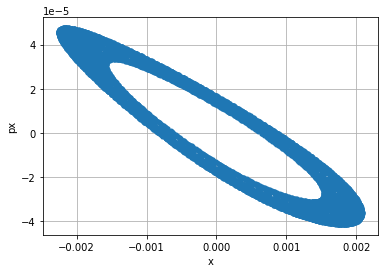

In [71]:
plt.plot(x_part3,px_part3,'.')
plt.grid()
plt.xlabel('x')
plt.ylabel('px');

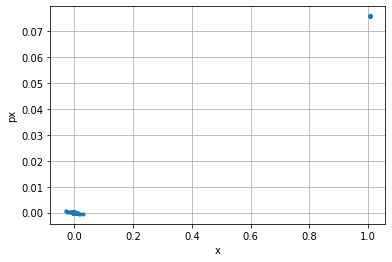

In [72]:
plt.plot(x_part4,px_part4,'.')
plt.grid()
plt.xlabel('x')
plt.ylabel('px');

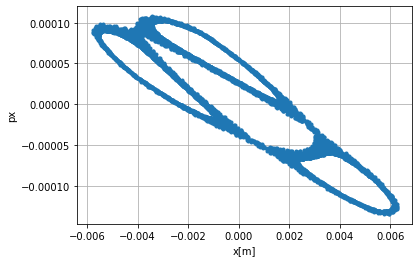

In [73]:
plt.plot(x_part5,px_part5,'.')
plt.grid()
plt.xlabel('x[m]')
plt.ylabel('px');

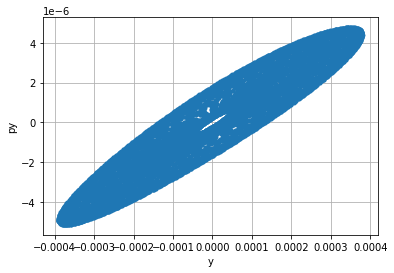

In [74]:
plt.plot(y_part2,py_part2,'.')
plt.grid()
plt.xlabel('y')
plt.ylabel('py');

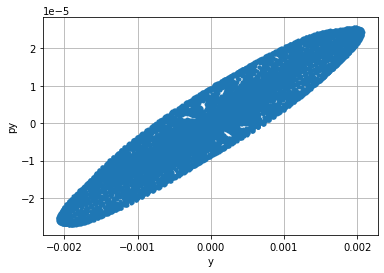

In [75]:
plt.plot(y_part3,py_part3,'.')
plt.grid()
plt.xlabel('y')
plt.ylabel('py');

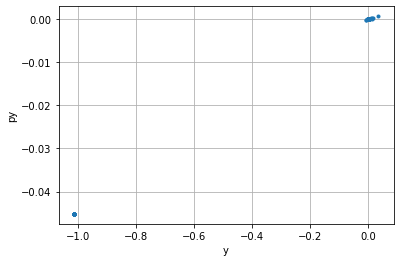

In [76]:
plt.plot(y_part4,py_part4,'.')
plt.grid()
plt.xlabel('y')
plt.ylabel('py');

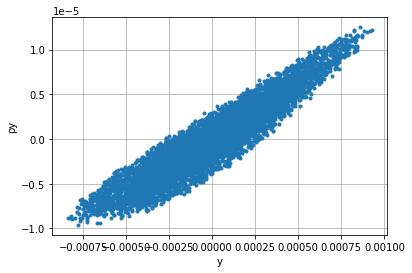

In [77]:
plt.plot(y_part5,py_part5,'.')
plt.grid()
plt.xlabel('y')
plt.ylabel('py');

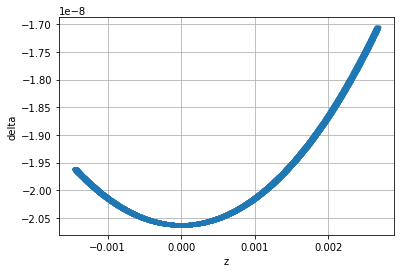

In [78]:
plt.plot(zeta_part2,delta_part2,'.')
plt.grid()
plt.xlabel('z')
plt.ylabel('delta');

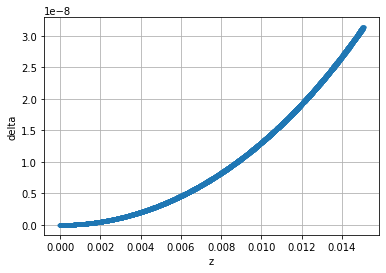

In [79]:
plt.plot(zeta_part3,delta_part3,'.')
plt.grid()
plt.xlabel('z')
plt.ylabel('delta');

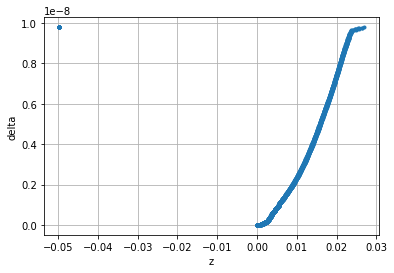

In [80]:
plt.plot(zeta_part4,delta_part4,'.')
plt.grid()
plt.xlabel('z')
plt.ylabel('delta');

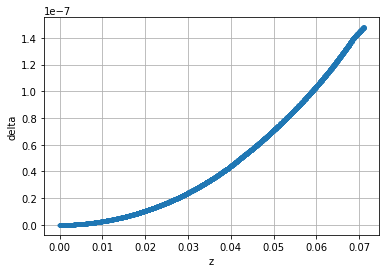

In [81]:
plt.plot(zeta_part5,delta_part5,'.')
plt.grid()
plt.xlabel('z')
plt.ylabel('delta');

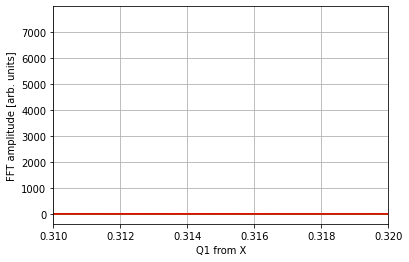

In [82]:
#Max_reco_freq= sampling frequency/2.
plt.figure()
#plt.plot(np.linspace(0,1,len(x_part0)), np.abs(np.fft.fft(x_part0)), 'b')
#plt.plot(np.linspace(0,1,len(x_part1)), np.abs(np.fft.fft(x_part1)), 'c')
plt.plot(np.linspace(0,1,len(x_part2)), np.abs(np.fft.fft(x_part2)), 'm')
plt.plot(np.linspace(0,1,len(x_part3)), np.abs(np.fft.fft(x_part3)), 'y')
plt.plot(np.linspace(0,1,len(x_part4)), np.abs(np.fft.fft(x_part4)), 'g')
plt.plot(np.linspace(0,1,len(x_part5)), np.abs(np.fft.fft(x_part5)), 'r')
plt.xlabel('Q1 from X')
plt.ylabel('FFT amplitude [arb. units]')
plt.xlim(0.31,0.32)
plt.grid()
#print(np.abs(np.fft.fft(x_part)))

In [83]:
#q0 = NAFFlib.get_tune(x_part0)
#q1 = NAFFlib.get_tune(x_part1)
q2 = NAFFlib.get_tune(x_part2)
q3 = NAFFlib.get_tune(x_part3)
q4 = NAFFlib.get_tune(x_part4)
q5 = NAFFlib.get_tune(x_part5)
print('q2 =', q2, ', q3 =', q3, ', q4 =', q4,', q5 =', q5)
tunes = np.zeros(4)
#tunes[0]=q0
#tunes[0]=q1
tunes[0]=q2
tunes[1]=q3
tunes[2]=q4
tunes[3]=q5
#print(positions[3],tunes[3])

q2 = 0.31409602662485914 , q3 = 0.31614351536670143 , q4 = -9.870667273573384e-12 , q5 = 0.3333332107921352


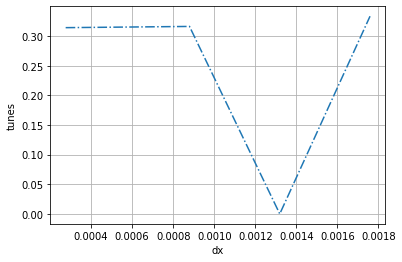

In [84]:
plt.plot(positions,tunes,'-.')
plt.grid()
plt.xlabel('dx')
plt.ylabel('tunes');
#plt.ylim(0.312,0.315)

0.0017592145396561501 0.02005112358230049
The line i find has an equation y = 3.9328945027448*x - 0.0017396740245019, but m should be 140.13812335793625


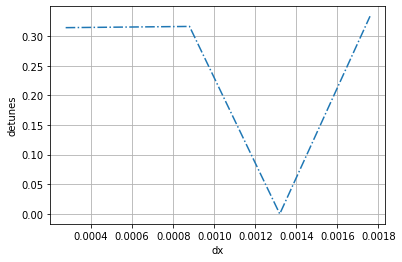

In [85]:
q2_1 = 0.31301791599918444
q3_1 = 0.3130712654474325 
q4_1 = 0.3131594674222655
q5_1 = 0.3132820872098347
detunes = np.zeros(4)
detunes[0]=q2-q2_1
detunes[1]=q3-q3_1
detunes[2]=q4-q4_1
detunes[3]=q5-q5_1
plt.plot(positions,tunes,'-.')
m = (K_OCT)/(32*np.pi)
plt.grid()
plt.xlabel('dx')
plt.ylabel('detunes');
print(positions[3],detunes[3])
print('The line i find has an equation y = 3.9328945027448*x - 0.0017396740245019, but m should be',m)